In [2]:
# Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
df = pd.read_pickle("/Users/sarahboller/Desktop/CF 4 Instacart Basket Analysis/02 Data/Prepared Data/clean_merge.pkl")

In [4]:
# Step 2 Delete columns that pose a security risk (and unnecessary columns)
df.drop(columns = ['first_name', 'last_name'])

,user_id,gender,state,age,date_joined,n_dependents,fam_status,income,order_id,order_number,...,product_name,aisle_id,department_id,prices,max_order,loyalty_flag,mean_price,Spender_flag,median_freq,freq_flag
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,2543867,5,...,Soda,77,7,9.0,8,New customer,7.988889,Low Spender,19.0,Regular customer
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,1285508,7,...,Soda,77,7,9.0,8,New customer,7.988889,Low Spender,19.0,Regular customer
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,2578584,8,...,Soda,77,7,9.0,8,New customer,7.988889,Low Spender,19.0,Regular customer
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,423547,2,...,0% Greek Strained Yogurt,120,16,12.6,8,New customer,7.988889,Low Spender,19.0,Regular customer
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,2524893,3,...,0% Greek Strained Yogurt,120,16,12.6,8,New customer,7.988889,Low Spender,19.0,Regular customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32404854,80148,Female,New York,55,4/1/2020,1,married,57095,2859858,3,...,"Protein Bar, Chocolate Pretzel",3,19,4.7,4,New customer,3.886667,Low Spender,12.0,Regular customer
32404855,80148,Female,New York,55,4/1/2020,1,married,57095,2859858,3,...,Chocolate Fudge High Protein Bar,3,19,4.0,4,New customer,3.886667,Low Spender,12.0,Regular customer
32404856,80148,Female,New York,55,4/1/2020,1,married,57095,3209855,4,...,Pumpkin Spice Latte Iced Coffee Pure Cold Brew...,26,7,4.7,4,New customer,3.886667,Low Spender,12.0,Regular customer
32404857,80148,Female,New York,55,4/1/2020,1,married,57095,2859858,3,...,Chocolate Coconut Almond Protein Bar,3,19,1.8,4,New customer,3.886667,Low Spender,12.0,Regular customer


In [5]:
df.head()

,user_id,first_name,last_name,gender,state,age,date_joined,n_dependents,fam_status,income,...,product_name,aisle_id,department_id,prices,max_order,loyalty_flag,mean_price,Spender_flag,median_freq,freq_flag
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Soda,77,7,9.0,8,New customer,7.988889,Low Spender,19.0,Regular customer
1,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Soda,77,7,9.0,8,New customer,7.988889,Low Spender,19.0,Regular customer
2,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Soda,77,7,9.0,8,New customer,7.988889,Low Spender,19.0,Regular customer
3,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,0% Greek Strained Yogurt,120,16,12.6,8,New customer,7.988889,Low Spender,19.0,Regular customer
4,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,0% Greek Strained Yogurt,120,16,12.6,8,New customer,7.988889,Low Spender,19.0,Regular customer


In [6]:
grouped_data = df.groupby('state')

In [7]:
grouped_data.head()

,user_id,first_name,last_name,gender,state,age,date_joined,n_dependents,fam_status,income,...,product_name,aisle_id,department_id,prices,max_order,loyalty_flag,mean_price,Spender_flag,median_freq,freq_flag
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Soda,77,7,9.0,8,New customer,7.988889,Low Spender,19.0,Regular customer
1,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Soda,77,7,9.0,8,New customer,7.988889,Low Spender,19.0,Regular customer
2,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Soda,77,7,9.0,8,New customer,7.988889,Low Spender,19.0,Regular customer
3,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,0% Greek Strained Yogurt,120,16,12.6,8,New customer,7.988889,Low Spender,19.0,Regular customer
4,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,0% Greek Strained Yogurt,120,16,12.6,8,New customer,7.988889,Low Spender,19.0,Regular customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41869,63554,nan,Williamson,Female,Delaware,49,1/2/2017,3,married,30236,...,Organic Gala Apples,24,4,9.1,63,Loyal customer,6.467460,Low Spender,2.0,Frequent customer
41870,63554,nan,Williamson,Female,Delaware,49,1/2/2017,3,married,30236,...,Organic Strawberries,24,4,7.3,63,Loyal customer,6.467460,Low Spender,2.0,Frequent customer
41871,63554,nan,Williamson,Female,Delaware,49,1/2/2017,3,married,30236,...,Organic Strawberries,24,4,7.3,63,Loyal customer,6.467460,Low Spender,2.0,Frequent customer
41872,63554,nan,Williamson,Female,Delaware,49,1/2/2017,3,married,30236,...,Organic Strawberries,24,4,7.3,63,Loyal customer,6.467460,Low Spender,2.0,Frequent customer


In [8]:
# Step 3 Compare Customer behavior in different regions

In [26]:
state_region_mapping = {
    'Maine': 'Northeast',
    'New Hampshire': 'Northeast',
    'Vermont': 'Northeast',
    'Massachusetts': 'Northeast',
    'Rhode Island' : 'Northeast',
    'Connecticut' : 'Northeast',
    'New York' : 'Northeast',
    'Pennsylvania' : 'Northeast',
    'New Jersey' : 'Northeast',
    'Wisconsin' : 'Midwest',
    'Michigan' : 'Midwest',
    'Illinois' : 'Midwest',
    'Indiana' : 'Midwest',
    'Ohio' : 'Midwest',
    'North Dakota' : 'Midwest',
    'South Dakota' : 'Midwest',
    'Nebraska' : 'Midwest',
    'Kansas' : 'Midwest',
    'Minnesota' : 'Midwest',
    'Iowa' : 'Midwest',
    'Missouri' : 'Midwest',
    'Delaware' : 'South',
    'Maryland' : 'South',
    'District of Columbia' : 'South',
    'Virginia' : 'South',
    'West Virginia' : 'South',
    'North Carolina' : 'South',
    'South Carolina' : 'South',
    'Georgia' : 'South',
    'Florida' : 'South',
    'Kentucky' : 'South',
    'Tennessee' : 'South',
    'Mississippi' : 'South',
    'Alabama' : 'South',
    'Oklahoma' : 'South',
    'Texas' : 'South',
    'Arkansas' : 'South',
    'Louisiana' : 'South',
    'Idaho' : 'West',
    'Montana' : 'West',
    'Wyoming' : 'West',
    'Nevada' : 'West',
    'Utah' : 'West',
    'Colorado' : 'West',
    'Arizona' : 'West',
    'New Mexico' : 'West',
    'Alaska' : 'West',
    'Washington' : 'West',
    'Oregon' : 'West',
    'California' : 'West',
    'Hawaii' : 'West'}

In [27]:
df['region'] = df['state'].map(state_region_mapping)

In [11]:
df.head()

,user_id,first_name,last_name,gender,state,age,date_joined,n_dependents,fam_status,income,...,aisle_id,department_id,prices,max_order,loyalty_flag,mean_price,Spender_flag,median_freq,freq_flag,region
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,77,7,9.0,8,New customer,7.988889,Low Spender,19.0,Regular customer,Midwest
1,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,77,7,9.0,8,New customer,7.988889,Low Spender,19.0,Regular customer,Midwest
2,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,77,7,9.0,8,New customer,7.988889,Low Spender,19.0,Regular customer,Midwest
3,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,120,16,12.6,8,New customer,7.988889,Low Spender,19.0,Regular customer,Midwest
4,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,120,16,12.6,8,New customer,7.988889,Low Spender,19.0,Regular customer,Midwest


In [12]:
df.tail(25)

,user_id,first_name,last_name,gender,state,age,date_joined,n_dependents,fam_status,income,...,aisle_id,department_id,prices,max_order,loyalty_flag,mean_price,Spender_flag,median_freq,freq_flag,region
32404834,81095,Rose,Rollins,Female,California,27,4/1/2020,1,married,99799,...,104,13,4.0,3,New customer,8.273077,Low Spender,22.0,Non-frequent customer,West
32404835,81095,Rose,Rollins,Female,California,27,4/1/2020,1,married,99799,...,21,16,13.3,3,New customer,8.273077,Low Spender,22.0,Non-frequent customer,West
32404836,81095,Rose,Rollins,Female,California,27,4/1/2020,1,married,99799,...,21,16,13.3,3,New customer,8.273077,Low Spender,22.0,Non-frequent customer,West
32404837,81095,Rose,Rollins,Female,California,27,4/1/2020,1,married,99799,...,20,11,8.8,3,New customer,8.273077,Low Spender,22.0,Non-frequent customer,West
32404838,81095,Rose,Rollins,Female,California,27,4/1/2020,1,married,99799,...,84,16,7.2,3,New customer,8.273077,Low Spender,22.0,Non-frequent customer,West
32404839,81095,Rose,Rollins,Female,California,27,4/1/2020,1,married,99799,...,84,16,7.2,3,New customer,8.273077,Low Spender,22.0,Non-frequent customer,West
32404840,81095,Rose,Rollins,Female,California,27,4/1/2020,1,married,99799,...,79,1,8.5,3,New customer,8.273077,Low Spender,22.0,Non-frequent customer,West
32404841,81095,Rose,Rollins,Female,California,27,4/1/2020,1,married,99799,...,110,13,12.2,3,New customer,8.273077,Low Spender,22.0,Non-frequent customer,West
32404842,81095,Rose,Rollins,Female,California,27,4/1/2020,1,married,99799,...,72,13,6.5,3,New customer,8.273077,Low Spender,22.0,Non-frequent customer,West
32404843,81095,Rose,Rollins,Female,California,27,4/1/2020,1,married,99799,...,70,11,14.6,3,New customer,8.273077,Low Spender,22.0,Non-frequent customer,West


In [13]:
df['region'].value_counts(dropna = False)

region
South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: count, dtype: int64

In [14]:
crosstab = pd.crosstab(df ['Spender_flag'], df['region'], dropna = False)

In [15]:
crosstab.to_clipboard()

In [16]:
df['Spender_flag'].value_counts(dropna = False)

Spender_flag
Low Spender     31770614
High Spender      634245
Name: count, dtype: int64

In [17]:
# Percentage wise, all regions have the same spending habits. ~2% are high spenders and ~98% are low spenders

In [18]:
df['loyalty_flag'].value_counts(dropna = False)

loyalty_flag
Regular customer    15876776
Loyal customer      10284093
New customer         6243990
Name: count, dtype: int64

In [19]:
df['freq_flag'].value_counts(dropna = False)

freq_flag
Frequent customer        21559853
Regular customer          7208564
Non-frequent customer     3636437
NaN                             5
Name: count, dtype: int64

In [20]:
crosstab_2= pd.crosstab(df ['freq_flag'], df['region'], dropna = False)

In [21]:
crosstab_2.to_clipboard()

In [22]:
# Percentage wise, all regions have the same frequency stats. ~67% are Frequent, ~22% are regular customers, ~11% are non-frequent

In [23]:
# Frequency rates: median Last order was more than 20 days (non-frequent), median was less than or equal to 20 days but more than 10 day (regular), median was less than 10 days (frequent)

In [24]:
crosstab_3= pd.crosstab(df ['loyalty_flag'], df['region'], dropna = False)

In [25]:
crosstab_3.to_clipboard()

In [26]:
# Percentage wise, all regions have the same loyalty stat. ~32% are loyal (More than 40 orders), ~49% are regular customers (10 < max orders <= 40), ~19% are new customers (10 or less orders)

In [27]:
# Step 4. CFO only wants customer with more than 5 orders.
df_CFO = df.loc[df['max_order']>= 5]

In [28]:
df_CFO.shape

(30964564, 30)

In [29]:
df.shape

(32404859, 30)

In [30]:
#Export df for CFO
path = r'/Users/sarahboller/Desktop/CF 4 Instacart Basket Analysis'
df_CFO.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'CFO df.pkl'))

In [31]:
df.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'Progress in 4 point Ten'))

In [32]:
# Step 5 Making Profiling Variables 


In [62]:
## Create more flags based on income, age, and dependents
df.loc[df['income'] >= 127912 , 'income_flag'] = 'High income'

/var/folders/xq/j07ql7ls565cz8lmytmw14b40000gn/T/ipykernel_22052/4209358999.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'High income' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[df['income'] >= 127912 , 'income_flag'] = 'High income'


In [64]:
df.loc[(df['income'] <= 127912) & (df['income'] > 67584), 'income_flag'] = 'mid income'

In [63]:
df.loc[df['income'] <= 67584, 'income_flag'] = 'Low income'

In [65]:
df.loc[df['n_dependents'] >= 1, 'Parent_flag'] = 'parent'

/var/folders/xq/j07ql7ls565cz8lmytmw14b40000gn/T/ipykernel_22052/1611564312.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'parent' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[df['n_dependents'] >= 1, 'Parent_flag'] = 'parent'


In [66]:
df.loc[df['n_dependents'] ==0, 'Parent_flag'] = 'not a parent'

In [67]:
df.loc[df['age']<= 33, 'Age_Group'] = '18 to 33'

/var/folders/xq/j07ql7ls565cz8lmytmw14b40000gn/T/ipykernel_22052/301394788.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '18 to 33' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[df['age']<= 33, 'Age_Group'] = '18 to 33'


In [68]:
df.loc[(df['age'] > 33) & (df['age']<=49), 'Age_Group'] = '34 to 49'

In [69]:
df.loc[(df['age'] >49) & (df['age'] <=65), 'Age_Group'] = '50 to 65'

In [70]:
df.loc[df['age'] >65 , 'Age_Group'] = 'Over 65'

In [71]:
## Create profiles
df['customer_profiles'] = df['Age_Group'] + '_' + df['income_flag'] + '_' + df['Parent_flag']

In [72]:
df['customer_profiles'].value_counts(dropna=False)

customer_profiles
18 to 33_mid income_parent           3159580
34 to 49_mid income_parent           3060792
Over 65_mid income_parent            2934655
50 to 65_mid income_parent           2880974
18 to 33_Low income_parent           2865751
Over 65_High income_parent           2339398
50 to 65_High income_parent          2297156
34 to 49_Low income_parent           1706648
34 to 49_High income_parent          1363462
18 to 33_mid income_not a parent     1049272
34 to 49_mid income_not a parent      992520
Over 65_mid income_not a parent       982007
50 to 65_mid income_not a parent      974339
18 to 33_Low income_not a parent      957159
Over 65_Low income_parent             816133
50 to 65_Low income_parent            815139
50 to 65_High income_not a parent     793785
Over 65_High income_not a parent      759344
34 to 49_Low income_not a parent      570352
34 to 49_High income_not a parent     459343
50 to 65_Low income_not a parent      281936
Over 65_Low income_not a parent      

In [73]:
## Compare profiles to departments
crosstab_customer_profile = pd.crosstab(df ['customer_profiles'], df['department_id'], dropna = False)

In [74]:
# Steps 6-9

In [75]:
## I copied this to excel to make line charts there for efficiency purposes. 
crosstab_customer_profile.to_clipboard()

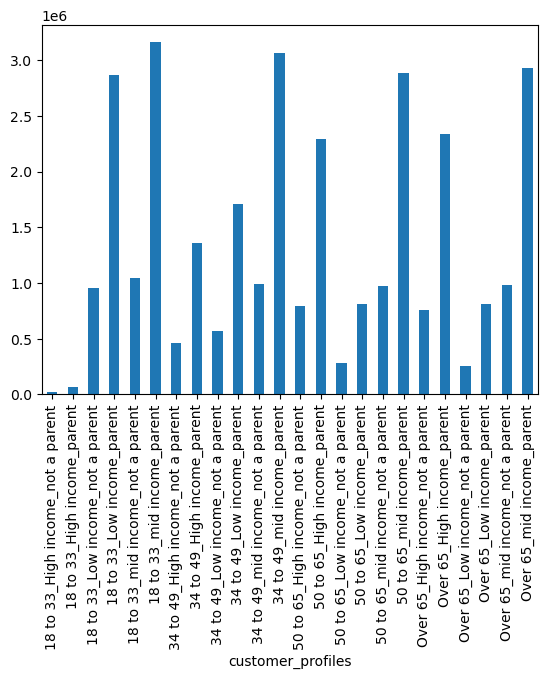

In [76]:
bar_profiles_sorted = df['customer_profiles'].value_counts().sort_index().plot.bar()

In [77]:
path = r'/Users/sarahboller/Desktop/CF 4 Instacart Basket Analysis'

In [78]:
bar_profiles_sorted.figure.savefig(os.path.join(path,'04 Analysis', 'Visualizations', 'bar_profiles_sorted'))

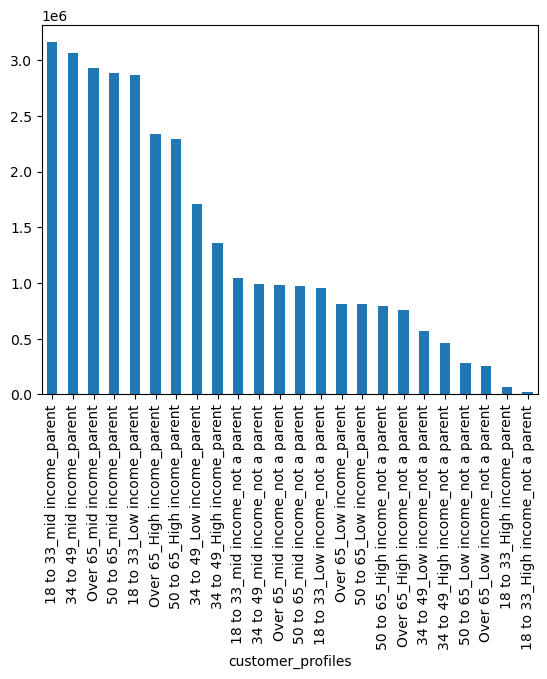

In [79]:
bar_profiles = df['customer_profiles'].value_counts().plot.bar()

In [80]:
bar_profiles.figure.savefig(os.path.join(path,'04 Analysis', 'Visualizations', 'bar_profiles'))

In [81]:
crosstab_customer_profile_region = pd.crosstab(df ['customer_profiles'], df['region'], dropna = False)

In [82]:
crosstab_region_department = pd.crosstab(df['region'], df['department_id'], dropna = False)

In [83]:
crosstab_customer_profile_region.to_clipboard()

In [84]:
crosstab_region_department.to_clipboard()

In [85]:
df.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'final with profiles.pkl'))

In [86]:
df.loc[(df['prices'] < 5), 'Price_range'] = 'low-range product'

In [87]:
df.loc[(df['prices'] >= 5) & (df['prices']<=15), 'Price_range'] = 'mid-range product'

In [88]:
df.loc[(df['prices'] >15), 'Price_range'] = 'high-range product'

In [89]:
df['Price_range'].value_counts()

Price_range
mid-range product     22086764
low-range product      9900417
high-range product      417678
Name: count, dtype: int64

In [90]:
df.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'final with profiles.pkl'))

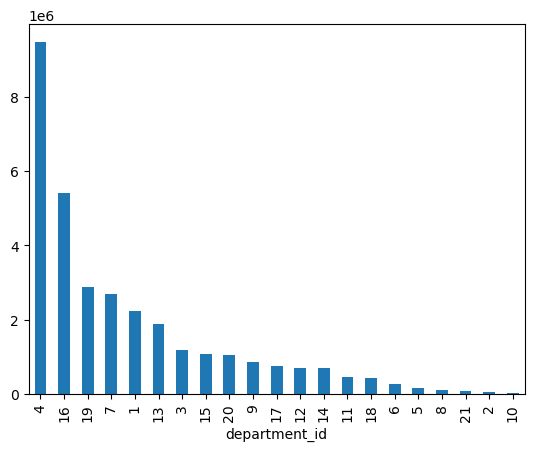

In [91]:
bar_department = df['department_id'].value_counts().plot.bar()

In [92]:
bar_department.figure.savefig(os.path.join(path,'04 Analysis', 'Visualizations', 'bar_department'))

In [93]:
df['loyalty_flag'].value_counts()

loyalty_flag
Regular customer    15876776
Loyal customer      10284093
New customer         6243990
Name: count, dtype: int64

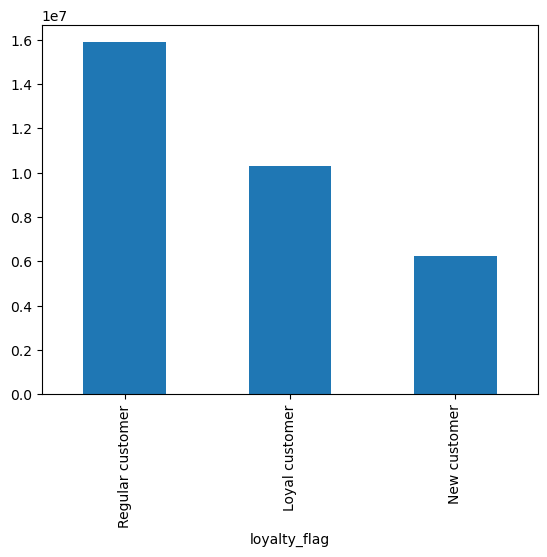

In [94]:
bar_loyalty= df['loyalty_flag'].value_counts().plot.bar()

In [95]:
bar_loyalty.figure.savefig(os.path.join(path,'04 Analysis', 'Visualizations', 'bar_loyalty'))

In [96]:
df['freq_flag'].value_counts()

freq_flag
Frequent customer        21559853
Regular customer          7208564
Non-frequent customer     3636437
Name: count, dtype: int64

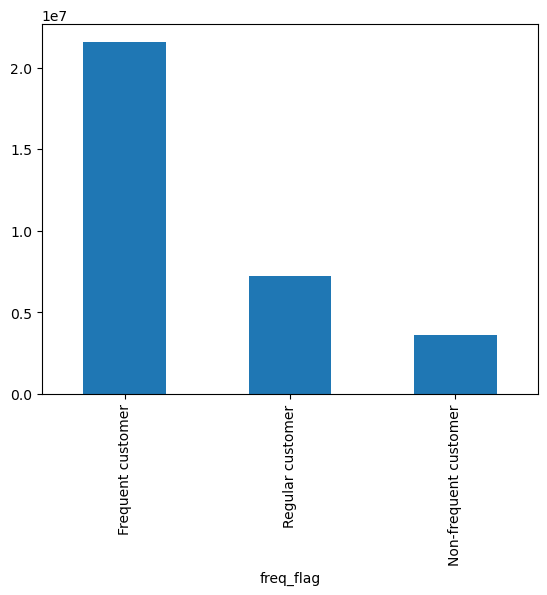

In [97]:
bar_freq= df['freq_flag'].value_counts().plot.bar()

In [98]:
crosstab_loyalty = pd.crosstab(df ['loyalty_flag'], df['department_id'], dropna = False)

In [99]:
crosstab_loyalty.to_clipboard()

In [101]:
crosstab_freq = pd.crosstab(df ['freq_flag'], df['department_id'], dropna = False)

In [102]:
crosstab_freq.to_clipboard()

In [103]:
crosstab_loyalty_time = pd.crosstab(df ['loyalty_flag'], df['time_of_order_hr'], dropna = False)

In [104]:
crosstab_loyalty_time.to_clipboard()

In [105]:
crosstab_loyalty_spendflag = pd.crosstab(df ['loyalty_flag'], df['Spender_flag'], dropna = False)

In [106]:
crosstab_loyalty_spendflag.to_clipboard()

In [107]:
crosstab_freq_time = pd.crosstab(df ['freq_flag'], df['time_of_order_hr'], dropna = False)

In [108]:
crosstab_freq_time.to_clipboard()

In [109]:
crosstab_freq_spendflag = pd.crosstab(df ['freq_flag'], df['Spender_flag'], dropna = False)

In [110]:
crosstab_freq_spendflag.to_clipboard()

In [111]:
state_region_mapping = {
    'Maine': 'Northeast',
    'New Hampshire': 'Northeast',
    'Vermont': 'Northeast',
    'Massachusetts': 'Northeast',
    'Rhode Island' : 'Northeast',
    'Connecticut' : 'Northeast',
    'New York' : 'Northeast',
    'Pennsylvania' : 'Northeast',
    'New Jersey' : 'Northeast',
    'Wisconsin' : 'Midwest',
    'Michigan' : 'Midwest',
    'Illinois' : 'Midwest',
    'Indiana' : 'Midwest',
    'Ohio' : 'Midwest',
    'North Dakota' : 'Midwest',
    'South Dakota' : 'Midwest',
    'Nebraska' : 'Midwest',
    'Kansas' : 'Midwest',
    'Minnesota' : 'Midwest',
    'Iowa' : 'Midwest',
    'Missouri' : 'Midwest',
    'Delaware' : 'South',
    'Maryland' : 'South',
    'District of Columbia' : 'South',
    'Virginia' : 'South',
    'West Virginia' : 'South',
    'North Carolina' : 'South',
    'South Carolina' : 'South',
    'Georgia' : 'South',
    'Florida' : 'South',
    'Kentucky' : 'South',
    'Tennessee' : 'South',
    'Mississippi' : 'South',
    'Alabama' : 'South',
    'Oklahoma' : 'South',
    'Texas' : 'South',
    'Arkansas' : 'South',
    'Louisiana' : 'South',
    'Idaho' : 'West',
    'Montana' : 'West',
    'Wyoming' : 'West',
    'Nevada' : 'West',
    'Utah' : 'West',
    'Colorado' : 'West',
    'Arizona' : 'West',
    'New Mexico' : 'West',
    'Alaska' : 'West',
    'Washington' : 'West',
    'Oregon' : 'West',
    'California' : 'West',
    'Hawaii' : 'West'}

In [112]:
df['region'] = df['state'].map(state_region_mapping)

In [113]:
crosstab_region_time = pd.crosstab(df['region'], df['time_of_order_hr'], dropna = False)

In [114]:
crosstab_region_spend= pd.crosstab(df ['region'], df['Spender_flag'], dropna = False)

In [115]:
crosstab_region_dept = pd.crosstab(df ['region'], df['department_id'], dropna = False)

In [116]:
crosstab_region_time.to_clipboard()

In [117]:
crosstab_region_spend.to_clipboard()

In [118]:
crosstab_region_dept.to_clipboard()


In [119]:
path = r'/Users/sarahboller/Desktop/CF 4 Instacart Basket Analysis'

In [120]:
df.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'final_profiles_flags.pkl'))


In [127]:
df['age_fam'] = df['Age_Group'] + '_' + df['fam_status']

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32404859 entries, 0 to 32404858
Data columns (total 36 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   user_id                 int64  
 1   first_name              object 
 2   last_name               object 
 3   gender                  object 
 4   state                   object 
 5   age                     int64  
 6   date_joined             object 
 7   n_dependents            int64  
 8   fam_status              object 
 9   income                  int64  
 10  order_id                int64  
 11  order_number            int64  
 12  orders_day_of_week      int64  
 13  time_of_order_hr        int64  
 14  days_since_prior_order  float64
 15  returning_customer      bool   
 16  product_id              int64  
 17  add_to_cart_order       int64  
 18  reordered               int64  
 19  product_name            object 
 20  aisle_id                int64  
 21  department_id           int64

In [129]:
df.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'final_profiles_flags.pkl'))

In [130]:
crosstab_age_fam_time = pd.crosstab(df ['age_fam'], df['department_id'], dropna = False)

In [131]:
crosstab_age_fam_time.to_clipboard()

In [132]:
crosstab_age_fam_time = pd.crosstab(df ['age_fam'], df['time_of_order_hr'], dropna = False)

In [133]:
crosstab_age_fam_time.to_clipboard()

In [134]:
crosstab_age_fam_spend = pd.crosstab(df ['age_fam'], df['Spender_flag'], dropna = False)

In [136]:
crosstab_age_fam_spend.to_clipboard()

In [137]:
crosstab_cust_profile = pd.crosstab(df ['customer_profiles'], df['Spender_flag'], dropna = False)

In [146]:
crosstab_cust_profile.to_clipboard()

In [143]:
crosstab_custpro_freq = pd.crosstab(df ['customer_profiles'], df['freq_flag'], dropna = False)

In [140]:
crosstab_custpro_loy = pd.crosstab(df ['customer_profiles'], df['loyalty_flag'], dropna = False)

In [144]:
crosstab_custpro_freq.to_clipboard()

In [145]:
crosstab_custpro_loy.to_clipboard()